In [1]:
#importing required modules 
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#creating column names
#loading csv file into a dataframe and assigning columns names as well
tbl_cols = ['draw_dt', 'first_num', 'second_num', 'third_num', 'fourth_num', 'fifth_num', 'mega_ball']
mm_tbl = pd.read_csv('winning_numbers_by_date_pd.txt',  header=None, names=tbl_cols, parse_dates=['draw_dt'])

#creating a new column called next_draw_date, calculating and assigning 
mm_tbl.loc[mm_tbl['draw_dt'].dt.dayofweek == 1.0, 'next_draw_dt'] = mm_tbl['draw_dt'] + datetime.timedelta(3)
mm_tbl.loc[mm_tbl['draw_dt'].dt.dayofweek == 4.0, 'next_draw_dt'] = mm_tbl['draw_dt'] + datetime.timedelta(4)

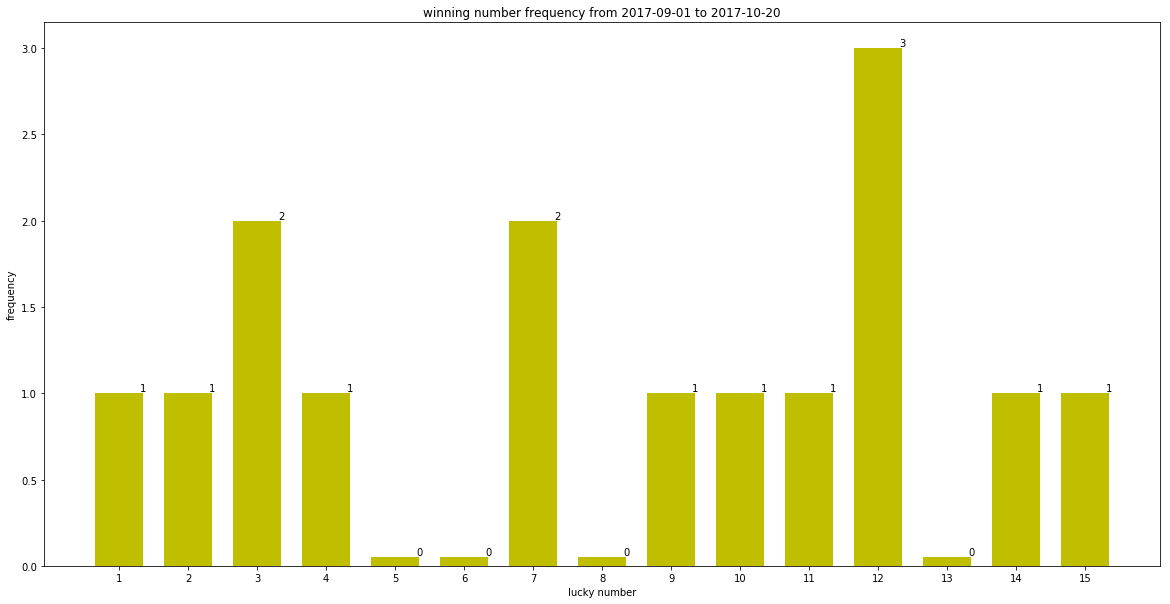

In [3]:
#########################
law_dt = mm_tbl['draw_dt'].max()
law_15db_dt = mm_tbl[mm_tbl['draw_dt'] >= law_dt -  datetime.timedelta(50)]['draw_dt'].min()

#########################      
freq_tble = mm_tbl[mm_tbl['draw_dt'] >= law_15db_dt]['mega_ball'].value_counts()

#########################  
for i in range(1,16):
    if freq_tble.get(i) == None:
        freq_tble[i] = 0.05
        
#########################
y1 = freq_tble.sort_index().values

#########################
N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.70        # the width of the bars


fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(ind, y1, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('frequency')
ax.set_xlabel('lucky number')
ax.set_title('winning number frequency from ' 
             + str(law_15db_dt.date()) 
             + ' to ' 
             + str(law_dt.date()))

ax.set_xticks(ind)
ax.set_xticklabels((ind + 1))

def autolabel(rects):
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width(), 
                rect.get_height(), 
                int(rect.get_height()), 
                ha='center', 
                va='bottom')


autolabel(rects1)

plt.show()